In [1]:
import sys
import os
file_path = os.path.dirname(os.path.realpath(__file__))
sys.path.append(os.path.join(file_path,'../build'))
import numpy as np
import libry as ry
import time
import cv2 as cv

**ry-c++-log** ry.cpp:init_LogToPythonConsole:34(0) initializing ry log callback

**ry-c++-log** util.cpp:initCmdLine:545(1) ** cmd line arguments: 'rai-pybind -python '
** INFO:ry.cpp:init_LogToPythonConsole:34(0) initializing ry log callback

**ry-c++-log** util.cpp:initCmdLine:549(1) ** run path: '/home/vasko/Documents/TUB3/AI_Robotics/robotics-course-prev/course3-Simulation'** INFO:util.cpp:initCmdLine:545(1) ** cmd line arguments: 'rai-pybind -python '


**ry-c++-log** graph.cpp:initParameters:1379(1) ** parsed parameters:
{python}

** INFO:util.cpp:initCmdLine:549(1) ** run path: '/home/vasko/Documents/TUB3/AI_Robotics/robotics-course-prev/course3-Simulation'

** INFO:graph.cpp:initParameters:1379(1) ** parsed parameters:
{python}



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

In [10]:
hey = dict()
hey["data"]=(np.arange(10),np.arange(20),np.arange(30))



{'whiskers': [<matplotlib.lines.Line2D at 0x7fef281160a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef28116760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef28189d00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fef28116e20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fef281221c0>,
 'means': []}

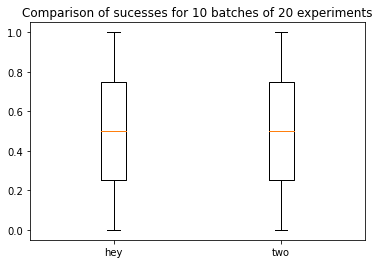

In [14]:
fig, ax = plt.subplots()
ax.set_title('Comparison of sucesses for 10 batches of 20 experiments')
ax.boxplot([np.arange(2),np.arange(2)], labels=["hey", "two"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef280fd430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef280fdaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef280fd0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef281081f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef28108550>],
 'means': []}

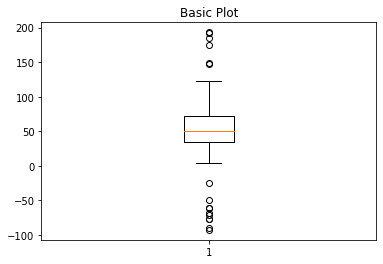

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

In [1]:
world_configuration = "../scenarios/pushSimWorldComplete.g"

C = ry.Config()
C.addFile(world_configuration)
C.getFrame("grapper_base").setContact(1)
C.addFrame("obj0")
C.getFrame("obj0").setColor([1.,0,0])
C.getFrame("obj0").setShape(ry.ST.sphere, [.03])
# C.getFrame("obj0").setPosition([0., .2, 1.])
C.getFrame("obj0").setPosition([0., .2, .7])

# C.getFrame("obj0").setContact(1)

box = C.getFrame("box")
box_start_state = box.getPosition()
box_t = C.getFrame("box_t")
ball = C.getFrame("ball")
# x_start, y_start = get_xy_position_diff(box_t, box)
# r_start = (x_start**2 + y_start**2)**.5 
# print(r_start)
game_over_threshold = 1.
reward_threshold = .1
score = 0
state = 3*[0]

S = C.simulation(ry.SimulatorEngine.bullet, True)

NameError: name 'ry' is not defined

In [25]:
y, J = C.evalFeature(ry.FS.distance, ["panda_coll0", "box"])
y

array([-0.055])

In [11]:
C.getFrame("obj0").setPosition(np.array(box.getPosition())+np.array([0.12,0,0]))

In [24]:
box.setPosition(C.getFrame("panda_coll0").getPosition() + np.array([0.28,0,0]))

In [17]:
def solve_komo_neutral(komo):
    # encode grasping
    komo.addObjective([1.], 
                    ry.FS.positionRel, 
                    ["gripperCenter", "world"], 
                    ry.OT.eq, 
                    1e2,
                    [0.,0.,1.5]);

#     komo.addObjective([1.], 
#                     ry.FS.quaternionRel, 
#                     ["grapper_base", "gripperCenter"], 
#                     ry.OT.eq, 
#                     [1e2],
#                     [.707,0,0,.707]);
#     komo.addObjective([1.], 
#                     ry.FS.quaternionRel, 
#                     ["grapper_base", "gripperCenter"], 
#                     ry.OT.eq, 
#                     [1e2],
#                     [1.,0,0,0]);

    komo.optimize()
#     IK.getReport()
    return komo.getPath_qOrg() 

In [18]:
def solve_komo_grasping(komo):
    # encode grasping
    komo.addObjective([1.], 
                    ry.FS.positionRel, 
#                     ["grapper_base", "gripperCenter"], 
                    ["obj0", "gripperCenter"],   
                    ry.OT.eq, 
                    1e2,
                    [0.,0.,.0]);

    komo.addObjective([1.], 
                    ry.FS.quaternionRel, 
#                     ["grapper_base", "gripperCenter"], 
                    ["obj0", "gripperCenter"],  
                    ry.OT.eq, 
                    [1e2],
                    [.707,0,0,.707]);
#     komo.addObjective([1.], 
#                     ry.FS.quaternionRel, 
#                     ["grapper_base", "gripperCenter"], 
#                     ry.OT.eq, 
#                     [1e2],
#                     [1.,0,0,0]);

    komo.optimize()
#     IK.getReport()
    return komo.getPath_qOrg() 

In [36]:
def solve_grasping_ball(komo):

    # encode grasping
    komo.addObjective([1.], 
                    ry.FS.positionRel, 
                    ["ball", "gripperCenter"], 
                    ry.OT.eq, 
                    1e2,
                    [0.,0.,.0]);

#     # encode hight tracking
#     komo.addObjective([0.,.5], 
#                 ry.FS.positionDiff, 
#                 ["ball", "gripperCenter"], 
#                 ry.OT.eq, 
#                 1.2e2*np.array([[0,0,1]]),
#                 [0.,0.,.0]);
    
    # add the pre-positon (TO BE ABOVE THE BALL and then go to the ball at the end)
#     komo.addObjective([.8], 
#                 ry.FS.positionDiff, 
#                 ["ball", "gripperCenter"], 
#                 ry.OT.eq, 
#                 1.2e2*np.array([[0,0,1]]),
#                 [0.,0.,.0]);
    
    
#     komo.addObjective([0.,1.], 
#                     ry.FS.quaternionRel, 
#                     ["ball", "gripperCenter"], 
#                     ry.OT.eq, 
#                     [1e2],
#                     [.579,.406,-.406,.579]);

    komo.addObjective([1.], ry.FS.qItself, [], ry.OT.eq, [1e2], order=1)

    komo.optimize()
    
    return


In [1]:
def solve_place_ball(komo, position):

    # encode grasping
    komo.addObjective([1.], 
                    ry.FS.distance, 
                    ["ball", "box"], 
                    ry.OT.ineq, 
                    1e2,
                    [0.]);

    komo.addObjective([1.], 
                    ry.FS.positionRel, 
                    ["ball", "world"], 
                    ry.OT.eq, 
                    1e2,
                    position);
    
    komo.addObjective([1.], ry.FS.qItself, [], ry.OT.eq, [1e2], order=1)

    komo.optimize()
    
    return


In [48]:
final_move = 1
box = C.getFrame("box")
box_t = C.getFrame("box_t")

start, direction = start_direction(box,np.nonzero(final_move)[0][0])

In [41]:
tau = .01
waypoints = 10
horizon_seconds = .5


In [42]:
def executeSplineGrasping(path, t):
    gripping = False  
    S.setMoveto(path, t)
    y=0
    while S.getTimeToMove() > 0. or gripping:
        time.sleep(tau)
        
        if gripping:
            S.setMoveto(S.get_q(),tau, append=False)
            
        S.step([], tau, ry.ControlMode.spline)
        C.setJointState(S.get_q()) 
        
        y, J = C.evalFeature(ry.FS.positionDiff, ["gripperCenter", "grapper_base"])

        if not gripping and np.linalg.norm(y) < .05:
            return True
            S.closeGripper("gripper", speed=.5)
            print("gripping")
            gripping = True

        if gripping and S.getGripperWidth("gripper") < 1e-3:
            print("FAILED!")
            S.openGripper("gripper", speed=1.)
            gripping = False
            break

        if gripping and S.getGripperIsGrasping("gripper"):
            print("GRASPED!")
            grasped = True
            C.attach("R_gripper", "object")
            break
    print(np.linalg.norm(y))

In [43]:
def executeSplineNeutral(path, t):
    gripping = False 
    S.setMoveto(path, t)
    S.openGripper("gripper", speed=1.)
    while S.getTimeToMove() > 0.:
        time.sleep(tau)
        S.step([], tau, ry.ControlMode.spline)
        C.setJointState(S.get_q()) 

In [24]:
komo = C.komo_path(1., waypoints, horizon_seconds, False)
solve_komo_grasping(komo)
komo.getReport()
komo.view(False, "motion")
# komo.view_play(True, 0.3)

# send the motion with spline

executeSplineGrasping(komo.getPath_qOrg(), 1)


#grab manipulator sensor readings from the simulation
q = S.get_q()

C.setJointState(q); # set your robot model to match the real q

** KOMO::run solver:sparse collisions:0 x-dim:70 T:10 k:2 phases:1 stepsPerPhase:10 tau:0.05  #timeSlices:12 #totalDOFs:70 #frames:756
** optimization time:0.010625 (kin:0.000448 coll:0 feat:0.006011 newton: -47.3762) setJointStateCount:46
   sos:80.5071 ineq:0 eq:0.0214349
0.6230345327995617


In [ ]:
komo = C.komo_path(1., waypoints, horizon_seconds, False)
solve_place_ball(komo, start)
komo.getReport()
komo.view(False, "motion")
# komo.view_play(True, 0.3)

# send the motion with spline

executeSplineNeutral(komo.getPath_qOrg(), 1)


#grab manipulator sensor readings from the simulation
q = S.get_q()

C.setJointState(q); # set your robot model to match the real q

** KOMO::run solver:sparse collisions:0 x-dim:70 T:10 k:2 phases:1 stepsPerPhase:10 tau:0.05  #timeSlices:12 #totalDOFs:70 #frames:756
**ry-c++-log** pairCollision.cpp:libccd:287(0) WARNING: called MPR penetration for non intersecting meshes...



In [ ]:
# tau = .01
# gripping = False
# for t in range(1000):
#     time.sleep(tau)

# #     if gripping:
# #         S.setMoveto(S.get_q(),tau, append=False)

#     S.step([], tau, ry.ControlMode.none)
#     C.setJointState(S.get_q()) 

#     y, J = C.evalFeature(ry.FS.positionDiff, ["gripperCenter", "obj0"])

#     if not gripping and np.linalg.norm(y) < .05:
#         S.closeGripper("gripper", speed=.5)
#         print("gripping")
#         gripping = True

#     if gripping and S.getGripperWidth("gripper") < 1e-3:
#         print("FAILED!")
#         S.openGripper("gripper", speed=1.)
#         gripping = False
#         break

#     if gripping and S.getGripperIsGrasping("gripper"):
#         print("GRASPED!")
#         grasped = True
#         C.attach("R_gripper", "object")
#         break

gripping


In [14]:
# q = S.get_q()
# q[-1] = 0

In [25]:
tau = 0.01
gripping = False
for t in range(3000):
    time.sleep(tau)

    #grab sensor readings from the simulation
    q = S.get_q()
#     if t%10 == 0:
#         [rgb, depth] = S.getImageAndDepth()  #we don't need images with 100Hz, rendering is slow

#         contours, full_mask = red_obj_det(rgb)
#         if (len(contours)!=0):
#             mv_ball_contour = find_moving_ball(prev_contours, prev_full_mask, contours, full_mask)

#             objectPosition = estimateBallPosition(depth, mv_ball_contour)
#             prev_contours, prev_full_mask = contours, full_mask

    # TOTAL CHEAT: grab the true position from the RealWorld
#     objectPosition = RealWorld.frame("obj0").getPosition();
#     obj.setPosition(objectPosition) # set the model object to percept

    C.setJointState(q); # set your robot model to match the real q

    y, J = C.evalFeature(ry.FS.positionDiff, ["gripperCenter", "obj0"])

#     qdot = np.linalg.inv(J.T@J + 1e-3*np.eye(q.shape[0])) @ J.T @ (-5*y)

#         komo_next_state = solve_komo_IK_grasping()[0]


#     C.setFrameState(komo_next_state)

    qdot = 0*( C.getJointState() - q ) /  (  40*tau )

    if not gripping and np.linalg.norm(y) < .03:
        S.closeGripper("gripper", speed=.5)
        gripping = True

    if gripping and S.getGripperWidth("gripper") < 1e-3:
        print("FAILED!")
        S.openGripper("gripper", speed=1.)
        gripping = False
        break

    if gripping and S.getGripperIsGrasping("gripper"):
        print("GRASPED!")
        grasped = True
        break

    S.step(qdot, tau, ry.ControlMode.velocity)

FAILED!


In [ ]:
# C = ry.Config()
# ball.setPosition([2, 0.1, 0.7])
# D = C.view();

In [ ]:
# box.setPosition([0.8, 0.1, 0.75])

In [ ]:
# ball.setPosition([2, 0.1, 0.7])

In [ ]:
# S.step(np.zeros(q.shape), .01, ry.ControlMode.velocity)

In [ ]:
# q = S.get_q()

In [ ]:
# q.shape

In [ ]:

# for t in range(100):    
# #         gt_pos = ball.getPosition()

    
#     S.step(np.zeros(q.shape), tau, ry.ControlMode.velocity)
#     time.sleep(tau)

### Euler Angles From quaternions
https://stackoverflow.com/questions/57063595/how-to-obtain-the-angle-between-two-quaternions
    

In [38]:
from pyquaternion import Quaternion
import math
import matplotlib.pyplot as plt

In [ ]:
res = []
for i in range(1000):
    psi = 2*math.pi*np.random.rand()
    R = np.array([[math.cos(psi), -math.sin(psi)],
                [math.sin(psi), math.cos(psi)]])

    ball_position_rel = np.array([.32 + np.random.rand()*.5, 0])
    ball_position_rel = R.dot(ball_position_rel)
    res += [ball_position_rel]

res = np.array(res)

plt.scatter(res[:,0],res[:,1])
plt.show()

In [ ]:
class Decoder(object):
    def __init__(self):
        self.act_dim = 16
        
    def decode_action(self, encoded_action):
        vel = 1

        psi = (2*math.pi/self.act_dim)* encoded_action

        R = np.array([[math.cos(psi), -math.sin(psi)],
                     [math.sin(psi), math.cos(psi)]])

        direction = np.array([vel, 0])

        direction = list(R.dot(direction)) + [0.] 
        
        full_direction = [0. if abs(d) < 1e-10 else d for d in direction] 

        return full_direction

In [ ]:
hey = Decoder()

In [ ]:
hey.decode_action(0)

In [32]:
def psi_to_quat(psi):
    return [math.cos(psi/2),0,0,math.sin(psi/2)]

def quat_to_psi(qd):
    return math.atan2( 2 * (qd.w * qd.z + qd.x * qd.y), 1 - 2 * (qd.y**2 + qd.z**2) )
    
def get_z_angle_diff(frame1, frame2):
    q1 = Quaternion(frame1.getQuaternion())
    q = Quaternion(frame2.getQuaternion())

    qd = q.conjugate * q1

    # Calculate Euler angles from this difference quaternion
    # phi   = math.atan2( 2 * (qd.w * qd.x + qd.y * qd.z), 1 - 2 * (qd.x**2 + qd.y**2) )
    # theta = math.asin ( 2 * (qd.w * qd.y - qd.z * qd.x) )
    psi   = quat_to_psi(qd)
    
    return psi

In [33]:
def get_xy_position_diff(frame1,frame2):
    res = frame1.getPosition() - frame2.getPosition()
    return res[0], res[1]

In [34]:
def rad_to_deg(angle):
    return angle/(2*math.pi)*360

In [35]:
def start_direction(frame, code):
    qd = Quaternion(frame.getQuaternion())
    psi   = math.atan2( 2 * (qd.w * qd.z + qd.x * qd.y), 1 - 2 * (qd.y**2 + qd.z**2) )
    
    R = np.array([[math.cos(psi), -math.sin(psi)],
                     [math.sin(psi), math.cos(psi)]])
    vel = 1
    dist = .22 
    offset = .1
    
    if code == 0:
        rel_start = np.array([-offset, -dist])
        direction = np.array([0, vel])
    elif code == 1:
        rel_start = np.array([0, -dist])
        direction = np.array([0, vel])
    elif code == 2:  
        rel_start = np.array([offset, -dist])
        direction = np.array([0, vel])
    elif code == 3:     
        rel_start = np.array([dist, -offset])
        direction = np.array([-vel, 0])
    elif code == 4:     
        rel_start = np.array([dist, 0])
        direction = np.array([-vel, 0])
    elif code == 5:     
        rel_start = np.array([dist, offset])
        direction = np.array([-vel, 0])
    elif code == 6:     
        rel_start = np.array([offset, dist])
        direction = np.array([0, -vel])
    elif code == 7:     
        rel_start = np.array([0, dist])
        direction = np.array([0, -vel])
    elif code == 8:     
        rel_start = np.array([-offset, dist])
        direction = np.array([0, -vel])
    elif code == 9:     
        rel_start = np.array([-dist, offset])
        direction = np.array([vel, 0])
    elif code == 10:   
        rel_start = np.array([-dist, 0])
        direction = np.array([vel, 0])
    elif code == 11: 
        rel_start = np.array([-dist, -offset])
        direction = np.array([vel, 0])
    
    pos = frame.getPosition()[:2] + R.dot(rel_start)
    direction = R.dot(direction)
    return list(pos) + [frame.getPosition()[2]] ,  list(direction) + [0.]
    

In [ ]:
# C = ry.Config()
# C.addFile("../scenarios/pushSimWorld.g")
# box_t = C.getFrame("box_t")
# box = C.getFrame("box")
# # box_t.setPosition(box.getPosition())
# ball = C.getFrame("ball")
# S = C.simulation(ry.SimulatorEngine.bullet, True)

# # Get angle and position diff
# za_diff = get_z_angle_diff(box_t, box)
# x_diff, y_diff = get_xy_position_diff(box_t, box)

#save the state and revert later 


# tau = 0.01
# for t in range(1000):
#     time.sleep(tau)
#     if t%10 == 0 :
#         start, direction = start_direction(box,t%11)
#         ball.setPosition(start)
#     S.step(direction, 0.01,  ry.ControlMode.velocity)
    
#Reset the environment

In [ ]:
# final_move = [0]*12
# final_move[11] = 1.
# game_step(final_move, box, box_t, ball)

In [ ]:
world_configuration = "../scenarios/pushSimWorldComplete.g"
C = ry.Config()
C.addFile(world_configuration)


box = C.getFrame("box")
box_start_state = box.getPosition()
box_t = C.getFrame("box_t")
ball = C.getFrame("ball")
x_start, y_start = get_xy_position_diff(box_t, box)
r_start = (x_start**2 + y_start**2)**.5 
print(r_start)
game_over_threshold = 1.
reward_threshold = .1
score = 0
state = 3*[0]

In [ ]:
# box_marker = C.addFrame("box_marker", parent="box" )
# box_marker.setShape(ry.ST.ssBox, [0.01, 0.15, 0.1, 0.01])
# box_marker.setColor([1,0,0,0.5])
# box_marker.setPosition(box.getPosition()+[0.0, -0.07, 0.02])

# box_t_marker = C.addFrame("box_marker", parent="box_t" )
# box_t_marker.setShape(ry.ST.ssBox, [0.01, 0.15, 0.1, 0.01])
# box_t_marker.setColor([1,.5,0,0.5])
# box_t_marker.setPosition(box_t.getPosition()+[0.0, -0.07, 0.02])

In [ ]:
S = C.simulation(ry.SimulatorEngine.bullet, True)

In [ ]:
box.setQuaternion(psi_to_quat(5))
S.setState(C.getFrameState())
S.step([], 0,  ry.ControlMode.none)
get_z_angle_diff(box_t, box)

In [ ]:
def solve_grasping_ball(komo):

    # encode grasping
    komo.addObjective([1.], 
                    ry.FS.positionRel, 
                    ["ball", "gripperCenter"], 
                    ry.OT.eq, 
                    1e2*np.array([[1,0,0],[0,1,0]]),
                    [0.,0.,.0]);

    # encode hight tracking
    komo.addObjective([0.,.5], 
                ry.FS.positionDiff, 
                ["ball", "gripperCenter"], 
                ry.OT.eq, 
                1.2e2*np.array([[0,0,1]]),
                [0.,0.,.0]);
    
    # add the pre-positon (TO BE ABOVE THE BALL and then go to the ball at the end)
    komo.addObjective([.8], 
                ry.FS.positionDiff, 
                ["ball", "gripperCenter"], 
                ry.OT.eq, 
                1.2e2*np.array([[0,0,1]]),
                [0.,0.,.0]);
    
    
    komo.addObjective([0.,1.], 
                    ry.FS.quaternionRel, 
                    ["ball", "gripperCenter"], 
                    ry.OT.eq, 
                    [1e2],
                    [.579,.406,-.406,.579]);

    komo.addObjective([1.], ry.FS.qItself, [], ry.OT.eq, [1e2], order=1)

    komo.optimize()
    
    return


In [ ]:
obj = C.addFrame("object")

In [ ]:
tau = .01
waypoints = 10
horizon_seconds = .5

def executeSpline(path, t):
    S.setMoveto(path, t)
    while S.getTimeToMove() > 0.:
        time.sleep(tau)
        S.step([], tau, ry.ControlMode.spline)
        C.setJointState(S.get_q())
        

komo = C.komo_path(1., waypoints, horizon_seconds, False)

solve_grasping_ball(komo)
komo.getReport()
komo.view(True, "motion")
komo.view_play(True, 0.3)

# send the motion with spline

executeSpline(komo.getPath_qOrg(), 1)

# S.setMoveto(komo.getPath_qOrg()[-10:], .1)

In [ ]:
 for t in range(6):
            time.sleep(self.tau)
            self.S.step(direction, self.tau,  ry.ControlMode.velocity)
        

In [ ]:
class Game:

    def __init__(self, world_configuration = "../scenarios/pushSimWorld.g"):
        self.C = ry.Config()
        self.C.addFile(world_configuration)
        self.S = self.C.simulation(ry.SimulatorEngine.bullet, True)
        
        self.tau = 0.0001
        self.box = self.C.getFrame("box")
        self.box_t = self.C.getFrame("box_t")
        self.ball = self.C.getFrame("ball")
        self.r_max = 2.
        self.disc_r = .3
        self.disc_angle = .5 # TODO: define meaningful angle
        self.state = 3*[0]
        self.start_r = 0
        self.start_angle = 0
        self.score = 0
        
        # random initialization 
        self.reset()
        
    def calculate_state(self):
        x_diff, y_diff = get_xy_position_diff(self.box_t, self.box)
        z_angle_diff = get_z_angle_diff(self.box_t, self.box)
        
        self.state = [x_diff, y_diff, z_angle_diff]

        
    def step(self, final_move):
        reward = 0
        game_over = False

        start, direction = start_direction(self.box,np.nonzero(final_move)[0][0])
        self.ball.setPosition(start)
        self.S.setState(self.C.getFrameState())
        
        # Updating the environment
        self.S.step([], 0,  ry.ControlMode.none)

        for t in range(6):
            time.sleep(self.tau)
            self.S.step(direction, self.tau,  ry.ControlMode.velocity)
        
        
        self.calculate_state();
        
        r = (self.state[0]**2 + self.state[1]**2)**.5
        
        dr = int(r / self.disc_r)
        dangle = int(self.state[2] / self.disc_angle)
        
        
        if r >= self.r_max: 
            reward = -3.
            game_over = True        
            
        elif dr < self.prev_dr:
            #TODO: dangle adding strategy
            reward = (self.prev_dr - dr)
            self.prev_dr = dr
            
        elif r < 0.01:
            game_over = True
            reward = 10 - abs(dangle)
            
         
        # penalize angle difference increase 
        if abs(self.prev_dangle)<abs(dangle):
            reward -= -1
            self.prev_dangle = dangle
            
        self.score += reward
        return reward, game_over, self.score
        
    def get_state(self):
        return self.state
    
    def reset(self):
        #define the new state of the box to be somewhere around the target:
        new_state = np.array(self.box_t.getPosition())+np.array([1.5*np.random.rand(),1.5*np.random.rand(),0])
        
        self.box.setQuaternion(psi_to_quat(2*math.pi*np.random.rand()))
        self.box.setPosition(new_state)
        self.S.setState(self.C.getFrameState())
        
        self.calculate_state();
        
        r = (self.state[0]**2 + self.state[1]**2)**.5
        
        self.prev_dr = int(r / self.disc_r)
        self.prev_dangle = int(self.state[2] / self.disc_angle)
        
        self.score = 0
        
        # Updating the environment
        self.S.step([], 0,  ry.ControlMode.none)
        
#         for t in range(2):
#             time.sleep(self.tau)
#             self.S.step([], self.tau,  ry.ControlMode.none)            

        return 
        
    

In [ ]:
np.random.rand()

In [ ]:
# box.setQuaternion([.966, 0., 0., 0.259])
# qd = Quaternion(box.getQuaternion())
# psi   = math.atan2( 2 * (qd.w * qd.z + qd.x * qd.y), 1 - 2 * (qd.y**2 + qd.z**2) )
# psi

In [ ]:
from lib.agent import Agent
from lib.helper import plot

In [ ]:
class LinearSchedule(object):
    def __init__(self, schedule_timesteps, final_p, initial_p):
        self.schedule_timesteps = schedule_timesteps
        self.final_p = final_p
        self.initial_p = initial_p

    def value(self, t):
        fraction = min(1.0, float(t) / self.schedule_timesteps)
        return self.initial_p + (self.final_p - self.initial_p) * fraction

In [ ]:
%matplotlib qt

from collections import deque
import lib.logger
import torch

class Worker:
    def __init__(self, 
                    # epsilon params
                    fraction_eps = 0.1, 
                    initial_eps = 0.05, 
                    final_eps = 0.1, 

                    # learning 
                    max_steps = 10_000_000, 
                    gamma = 0.97, 
                    learning_rate = 1e-3, 
                    learning_start_itr = 0, 
                    train_q_freq = 50,

                    # memory 
                    memory_len = 100_000,
                    batch_size = 1000,

                    #network
                    layers_sizes = [3, 256, 12],

                    #logging
                    log_freq = 1000,
                    log_dir = "data/local/game",
                ):

        lib.logger.session(log_dir).__enter__()
        self.log_freq = log_freq
        self.train_q_freq = train_q_freq
        self.layers_sizes = layers_sizes
        self.act_dim = self.layers_sizes[-1]
        self.max_steps = max_steps

        # Learning Agent 
        self.agent = Agent(
            gamma = gamma, 
            learning_rate = learning_rate, 
            memory_len = memory_len, 
            layers_sizes = self.layers_sizes,
            batch_size = batch_size
            )

        # Environment
        self.game = Game()

        # Tactics for exploraion/exploitation
        self.exploration = LinearSchedule(
            schedule_timesteps=int(fraction_eps * max_steps),
            initial_p=initial_eps,
            final_p=final_eps)


    def eps_greedy(self, state, epsilon):
        act = [0]*self.act_dim

        # Check Q function, do argmax.
        rnd = np.random.rand()
        if rnd > epsilon:
            state0 = torch.tensor(state, dtype=torch.float)
            prediction = self.agent.model(state0)
            move = torch.argmax(prediction).item()
            act[move] = 1
        else:
            act[np.random.randint(0, self.act_dim)] = 1
        
        return act

    def train(self):
        plot_scores = []
        plot_mean_scores = []
        episode_rewards = []
        total_score = 0
        record = 0     
        log_itr = 0

        l_episode_return = deque([], maxlen=10)
        l_tq_squared_error = deque(maxlen=50)   
        
        for itr in range(self.max_steps):
            # get old state
            state_old = self.game.get_state()

            # get move
            act = self.eps_greedy(state_old, self.exploration.value(itr))

            # perform move and get new state
            reward, done, score = self.game.step(act)
            state_new = self.game.get_state()

            episode_rewards.append(reward)

            # train short memory
            self.agent.train_short_memory(state_old, act, reward, state_new, done)

            # remember
            self.agent.remember(state_old, act, reward, state_new, done)

            if done:
                # train long memory, plot result
    #             print("done routine")
                self.game.reset()
                episode_return = np.sum(episode_rewards)

                if score > record:
                    record = score
                    self.agent.model.save()

                l_episode_return.append(episode_return)

                td_squared_error = self.agent.train_long_memory().data

                l_tq_squared_error.append(td_squared_error)

                # print('Game', itr, 'Score', score, 'Record:', record)

                # plot_scores.append(score)
                # total_score += score
                # mean_score = total_score / itr
                # plot_mean_scores.append(mean_score)
                # plot(plot_scores, plot_mean_scores)

            # if itr % self.train_q_freq == 0 and itr > self.learning_start_itr:
            #     td_squared_error = self.agent.train_long_memory()
            #     l_tq_squared_error.append(td_squared_error)

            if (itr + 1) % self.log_freq == 0 and len(l_episode_return) > 5:
                log_itr += 1
                lib.logger.logkv('Iteration', log_itr)
                lib.logger.logkv('Steps', itr)
                lib.logger.logkv('Epsilon', self.exploration.value(itr))
                lib.logger.logkv('Episodes', len(l_episode_return))
                lib.logger.logkv('AverageReturn', np.mean(l_episode_return))
                lib.logger.logkv('TDError^2', np.mean(l_tq_squared_error))
                lib.logger.dumpkvs()

In [ ]:
setup = Worker()
setup.train()